# $\color{ForestGreen}{\text{A Toy Dataset for Regression}}$

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Constructing a dataset consisting 10000 samples with 20 features and a target in R^8 

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10000, n_features=20, n_informative=5, n_targets=8, 
                       random_state=3, shuffle=True)

In [3]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

## $\color{ForestGreen}{\text{Decision Tree Regressor}}$

In [4]:
# Constructing a tree regressor with no specified hyperparameters

from sklearn import tree 

tr_reg = tree.DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [5]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [6]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.8054 



## $\color{ForestGreen}{\text{Bagged Decision Trees Regressor}}$

In [7]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [8]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [9]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9919 

R^2 score for test dataset =  0.9476 



## $\color{ForestGreen}{\text{Random Forest Regressor}}$

In [10]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)  # Instantiating the forest
rf_reg.fit(X_train, y_train)     

RandomForestRegressor(n_estimators=1000, random_state=3)

In [11]:
# Finding the predictions of the random forest regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

In [12]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9927 

R^2 score for test dataset =  0.949 



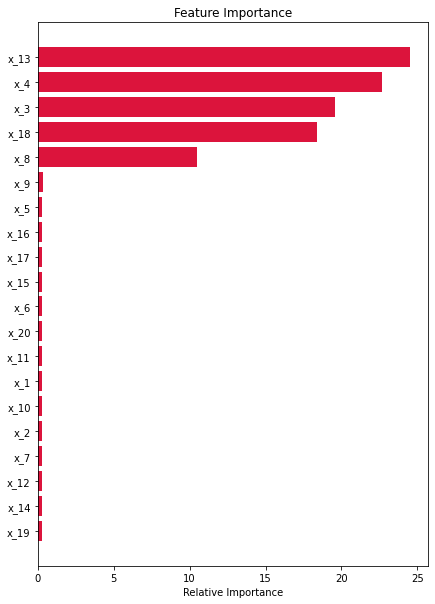

In [13]:
# Calculating the feature importance

feature_importance = rf_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 10))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, np.array(['x_%d' %(i+1) for i in range(20)])[sorted_idx])
plt.show()